In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset = pd.read_excel("Superstore_USA.xlsx")
dataset.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [ ]:
dataset.shape

(9426, 24)

In [ ]:
dataset.isnull().sum()

,0
Row ID,0
Order Priority,0
Discount,0
Unit Price,0
Shipping Cost,0
Customer ID,0
Customer Name,0
Ship Mode,0
Customer Segment,0
Product Category,0


In [ ]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

<ipython-input-5-416cfbce15de>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)


##Order Priority

In [ ]:
dataset['Order Priority'].value_counts()

,count
Order Priority,
High,1970
Low,1926
Not Specified,1881
Medium,1844
Critical,1804
Critical,1


In [ ]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [ ]:
dataset['Order Priority'] = dataset['Order Priority'].replace('Critical ','Critical')

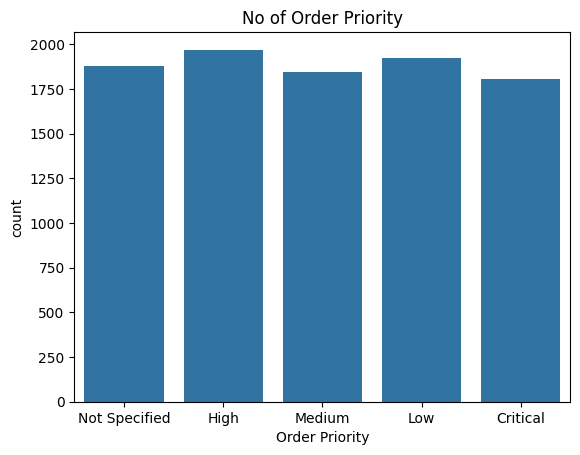

In [ ]:
sns.countplot(x='Order Priority',data=dataset)
plt.title('No of Order Priority')
plt.savefig('OrderPriority.png')
plt.show()

# Ship Mode

In [ ]:
dataset['Ship Mode'].value_counts()

,count
Ship Mode,
Regular Air,7036
Delivery Truck,1283
Express Air,1107


In [ ]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

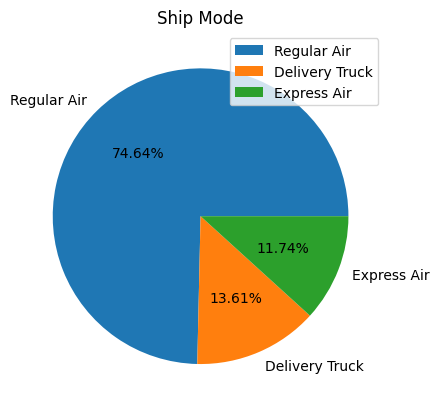

In [ ]:
#Q2: Which shipping mode is most commonly used?
plt.pie(y,labels=x,autopct='%0.2f%%')
plt.title('Ship Mode')
plt.legend()
plt.show()

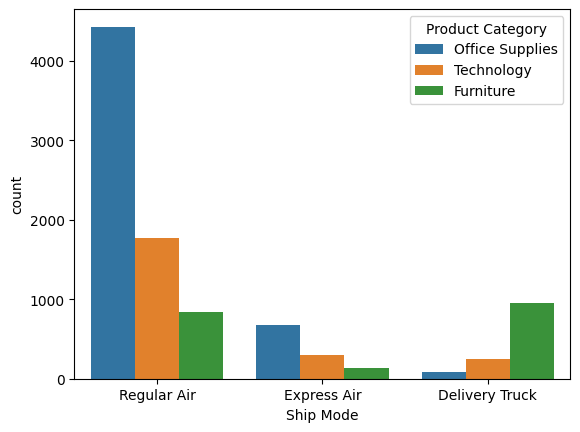

In [ ]:
sns.countplot(x='Ship Mode',data=dataset,hue='Product Category')
plt.show()

## CUSTOMER SEGMENT

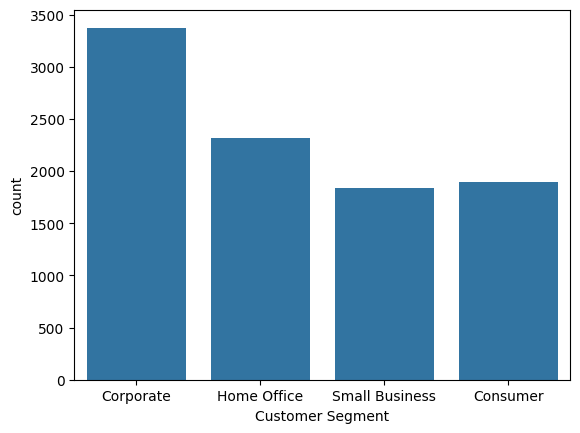

In [ ]:
sns.countplot(x='Customer Segment',data=dataset)               #Q3: Which customer segment brings the highest sales?
plt.show()

## PRODUCT CATOGERY

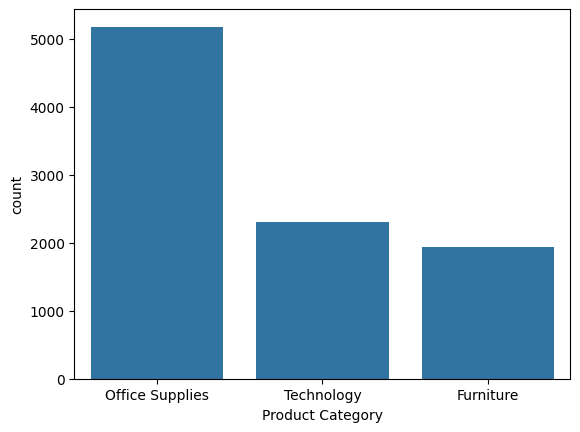

In [ ]:
sns.countplot(x='Product Category',data=dataset)        #Q1: What is the most frequently purchased product category?
plt.show()

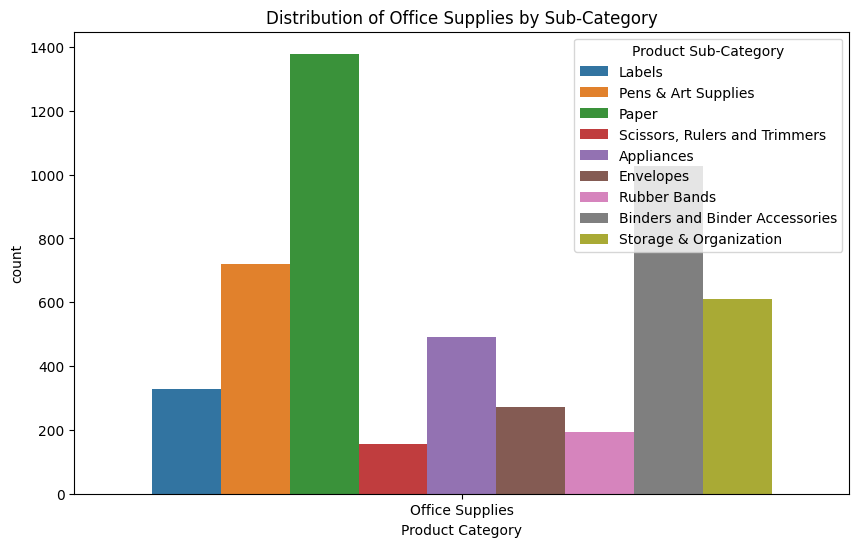

In [ ]:
#Q8: What product sub-categories are frequently bought under Office Supplies?
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category',data=dataset[dataset['Product Category']=='Office Supplies'],hue='Product Sub-Category')
plt.title('Distribution of Office Supplies by Sub-Category')
plt.show()

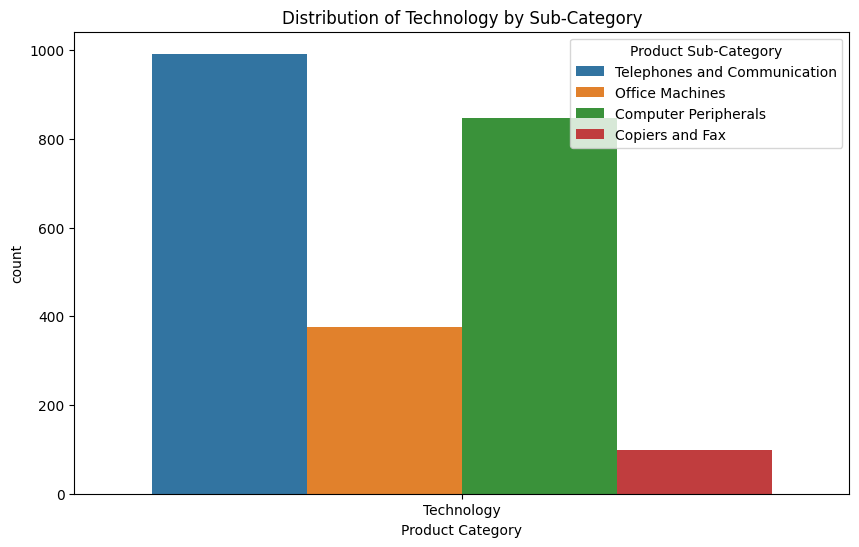

In [ ]:
#Q8: What product sub-categories are frequently bought under Technology?
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category',data=dataset[dataset['Product Category']=='Technology'],hue='Product Sub-Category')
plt.title('Distribution of Technology by Sub-Category')
plt.show()

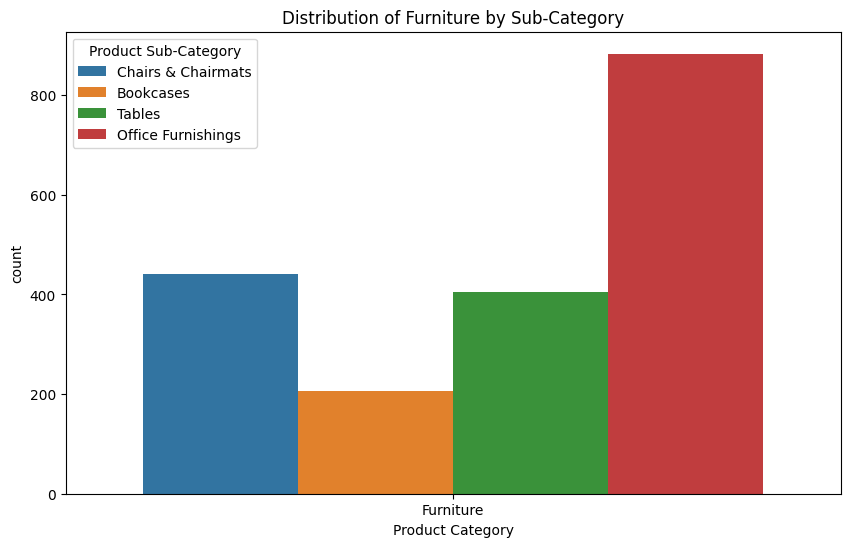

In [ ]:
#Q8: What product sub-categories are frequently bought under Furniture?
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category',data=dataset[dataset['Product Category']=='Furniture'],hue='Product Sub-Category')
plt.title('Distribution of Furniture by Sub-Category')
plt.show()

In [ ]:
dataset['Order Year'] = dataset['Order Date'].dt.year

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [ ]:
dataset['Order Year'].value_counts()

,count
Order Year,
2013,3054
2012,2241
2011,2179
2010,1952


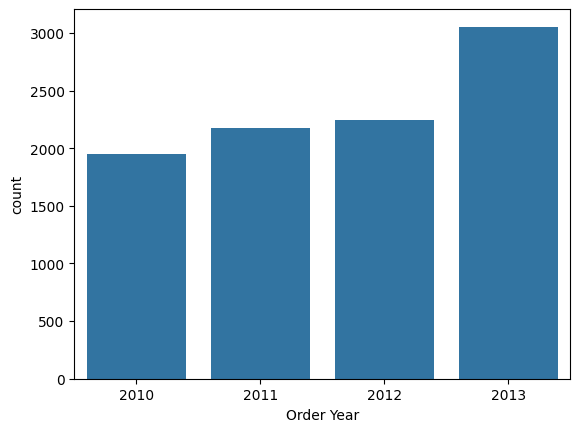

In [ ]:
sns.countplot(x='Order Year',data=dataset)
plt.savefig('OrderYear.png')                           #Q4: What is the trend of orders over different years?
plt.show()

##PROFIT

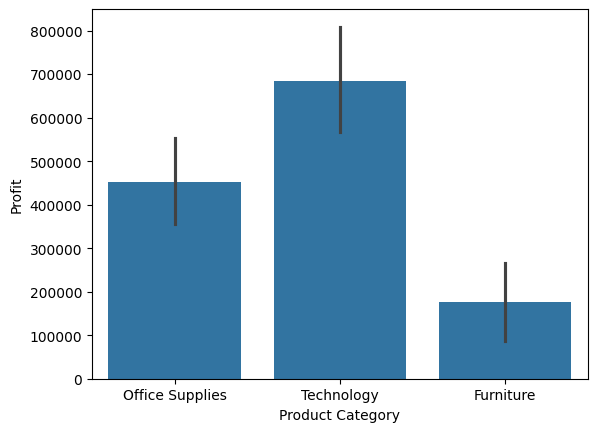

In [ ]:
sns.barplot(x='Product Category', y = 'Profit',data=dataset,estimator='sum')    #Q: Which product category contributes the most to the total profit?
plt.show()

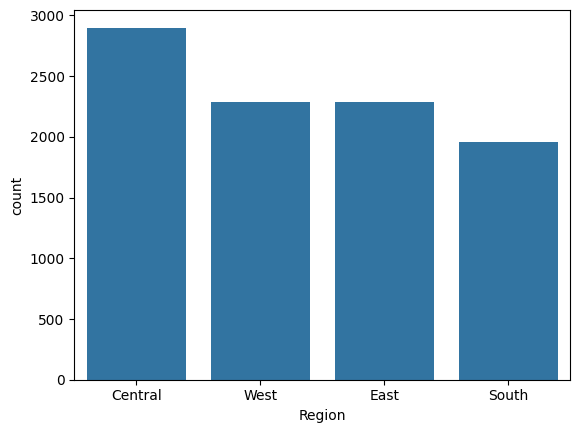

In [ ]:
sns.countplot(x='Region', data=dataset)             #Q7: Which region has the maximum number of sales?
plt.show()

In [ ]:
dataset['State or Province'].value_counts().head(10)                  #Q5: Which state records the highest number of orders?

,count
State or Province,
California,1021
Texas,646
Illinois,584
New York,574
Florida,522
Ohio,396
Washington,327
Michigan,327
Pennsylvania,271


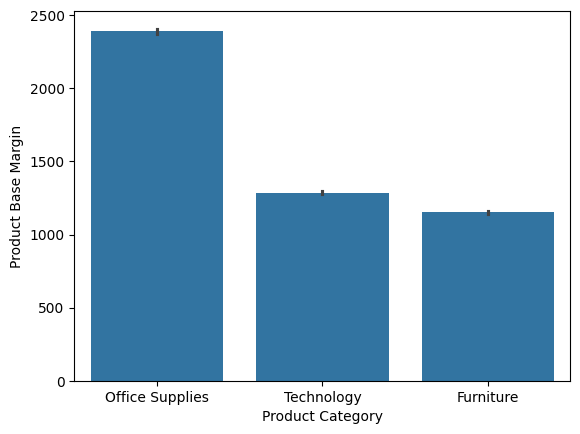

In [ ]:
sns.barplot(x='Product Category', y = 'Product Base Margin',data=dataset,estimator='sum')      #Which product category contributes the most to the overall product base margin?

plt.show()

In [ ]:
dataset['City'].value_counts().head(10)                  #Q10: Which cities have the highest number of orders?


,count
City,
New York City,202
Los Angeles,196
Seattle,93
Chicago,90
Boston,80
Washington,68
Philadelphia,58
Miami,50
Charlotte,47


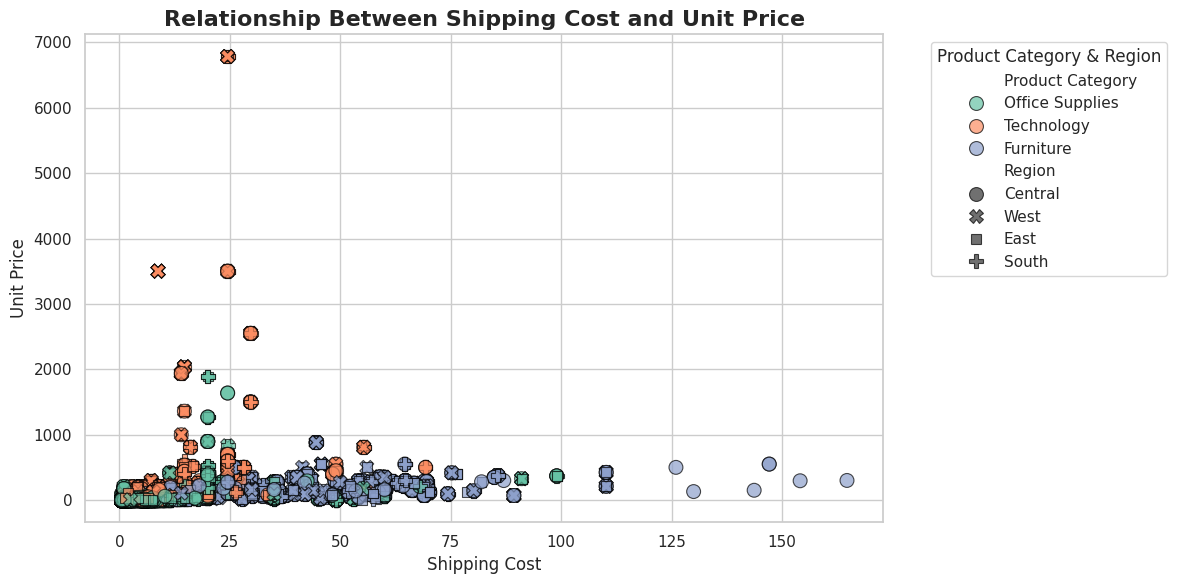

In [ ]:
plt.figure(figsize=(12, 6))                         #Q9: Is there any relation between shipping cost and unit price?
sns.set(style="whitegrid")
scatter = sns.scatterplot(
    x='Shipping Cost',
    y='Unit Price',
    data=dataset,
    hue='Product Category',
    style='Region',
    palette='Set2',
    alpha=0.7,
    edgecolor='black',
    s=100
)

plt.title('Relationship Between Shipping Cost and Unit Price', fontsize=16, fontweight='bold')
plt.xlabel('Shipping Cost', fontsize=12)
plt.ylabel('Unit Price', fontsize=12)
plt.legend(title='Product Category & Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()
